<a href="https://colab.research.google.com/github/ambuj501/Price-Forecasting-System/blob/main/Arima_Electricity_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pip install statsmodels

In [ ]:
pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.5MB 13.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#pip install statsmodels
#pip install --upgrade --no-deps statsmodels



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#!cp "prices_dataset.csv" "/content/drive/MyDrive/Major_Project/Price/prices_dataset.csv"

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Major_Project/Price/prices_dataset.csv")


In [ ]:
data.head(200)

,SETTLEMENTDATE,RRP
0,2018-01-01 00:30:00,81.27
1,2018-01-01 01:00:00,78.02
2,2018-01-01 01:30:00,65.02
3,2018-01-01 02:00:00,64.85
4,2018-01-01 02:30:00,64.23
...,...,...
195,2018-01-05 02:00:00,54.70
196,2018-01-05 02:30:00,52.78
197,2018-01-05 03:00:00,55.16
198,2018-01-05 03:30:00,54.25


In [ ]:
series = data['RRP'].values

In [ ]:
series.size

16032

In [ ]:
hr_data = []
i = 0
while(i<len(series)):
  hr_data.append(round((series[i]+series[i+1])/2))
  i = i+2


print(len(hr_data))





8016


In [ ]:
#Hourly Data
#df = pd.DataFrame(hr_data)
#df.to_csv("hourly_price.csv", index=False)
#!cp "hourly_price.csv" "/content/drive/MyDrive/Major_Project/Price/hourly_price.csv"

In [ ]:
hr_data = np.array(hr_data)

In [ ]:
8016-24

7992

In [ ]:
train = hr_data[:7992]

In [ ]:
test = hr_data[7992:]


In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose


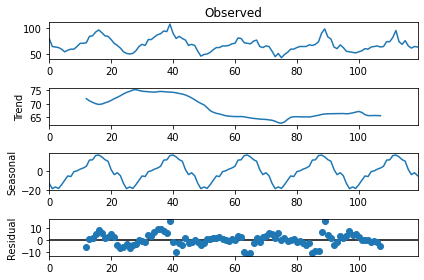

In [ ]:
result = seasonal_decompose(hr_data[:24*5], model='additive',period=24)
result.plot()
pyplot.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(hr_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.791862
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


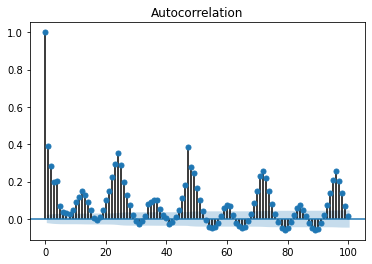

In [ ]:

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
plot_acf(hr_data, lags=100)
pyplot.show()


In [ ]:
model = ARIMA(train, order=(24,1,24))


In [ ]:
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
output  = model_fit.forecast(24)

In [ ]:
output

array([ 84.75671315,  80.06778585,  78.35715641,  76.12458958,
        89.16612092,  96.30941574,  92.25542187,  92.54538277,
        90.26980151,  95.27655605,  99.18905476,  97.62969677,
        86.90279096,  84.11017072,  93.18637977, 105.84009403,
       116.95741604, 133.89889949, 138.15774911, 129.1571082 ,
       116.7091074 , 103.1448556 ,  96.61766171,  91.03088585])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,output)

219.29936327105244

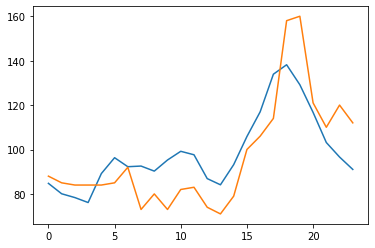

In [ ]:
import matplotlib.pyplot as plt
plt.plot(output)
plt.plot(test)
plt.show()

In [ ]:
j=0
for i in output:
  print(round(i),round(test[j]))
  j = j +1


85 88
80 85
78 84
76 84
89 84
96 85
92 92
93 73
90 80
95 73
99 82
98 83
87 74
84 71
93 79
106 100
117 106
134 114
138 158
129 160
117 121
103 110
97 120
91 112


In [ ]:
model_fit.save("/content/drive/MyDrive/Major_Project/Price/arima24_1_24.pkl")

In [ ]:
from statsmodels.tsa.arima_model import ARIMAResults

In [ ]:
loaded = ARIMAResults.load('arima.pkl')

FileNotFoundError: ignored

In [ ]:
loaded.forecast(3)

array([30.99999194, 32.00000247, 32.99998023])

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(train, order=(20, 1, 20), seasonal_order=(1,1,1, 24)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
output  = model.forecast(24)

In [ ]:
mean_squared_error(test,pred)

82.91666666666667

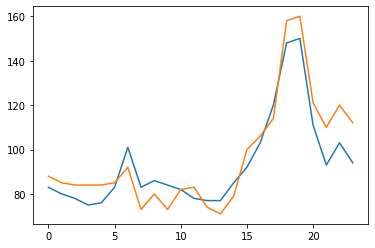

In [ ]:
plt.plot(pred)
plt.plot(test)
plt.show()